# PyQt5私房手册-控件

## 基本操作

### 如何添加控件

直接添加普通的控件，构造函数中需要指定父类。比如：
```python
class MyWidget(QWidget):
    def __init__(self):
        self.lbl = QLabel(self)
```
如果是布局，则可以通过布局的`addWidget`方法添加控件。
```python
class MyWidget(QWidget):
    def __init__(self):
        self.vbox = QVBoxLayout(self)
        self.lbl = QLabel()
        self.vbox.addWidget(self.lbl)
```

### 调整控件大小

调整控件大小一般可以使用`resize(width, height)`方法，也可以使用`setGeometry(x, y, width, height)`直接进行设置，后者相当于`resize(width, height)`和`move(x, y)`两者的结合。

## 控件

### `QtWidgets.QTreeView`

#### 如何可以多选 

添加一行代码即可：
```python
self.treeView.setSelectionMode(QAbstractItemView.ExtendedSelection)
```

此时可以通过`Ctrl`和`Shift`进行多选，返回的话主要以下两个方法：
- `self.treeView.currentIndex()`：返回最后选择的单项。
- `self.treeView.selectedIndexes()`：返回一个列表，包含所有选择的项。

注意：
1. 此时返回的是项是`QtCore.QModelIndex`对象，如果和`QFilesystemModel`搭配，想要返回路径，可以通过`model.filePath`方法将`index`对象转换成路径的字符串。
2. `setSelectionMode`方法属于`QAbstractItemView`，`treeView`继承了该方法，继承关系如下：
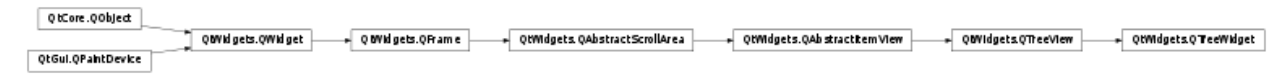

### `QtWidgets.QFilesystemModel`

#### 只显示名称，不显示其它的列

`QFilesysteModel`默认会显示4列，分别是name,size,type,modified。但是有时候不需要显示这么多列，有2种方法可以实现：

1. 编写`QFilesystemModel`子类，重写`columnCount`方法
```python
class MyQFileModel(QFileSystemModel):
    def columnCount(self, parent=None, *args, **kwargs):
        return 1
```
2. 修改调用`QFilesystemModel`的类，比如`QTreeView`，隐藏部分列
```python
self.model = QFileSystemModel
self.treeView.setModel(self.model)
self.treeView.setColumnHidden(1, True)
self.treeView.setColumnHidden(2, True)
self.treeView.setColumnHidden(3, True)
```

#### 只显示某个目录而不是整个文件系统

`QfilesystemModel`需要通过`setRootPath`设置根目录，但是注意它的显示规则，`windows`下，它主要显示盘符的顺序，默认情况下，`""`会从系统盘`C:`盘开始依次显示，如下：
```python
self.model.setRootPath("")
```
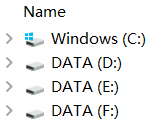

如果设置了别的目录，只是把目录所在的盘符提前：
```python
self.model.setRootPath("F:/movie/")
```
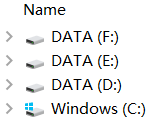

如果想要固定显示某个目录，不是调用`model`的`setRootPath`，而是使用`QTreeView`的`setRootIndex`方法：
```
self.treeView.setRootIndex(self.model.index(QDir.currentPath()))
```
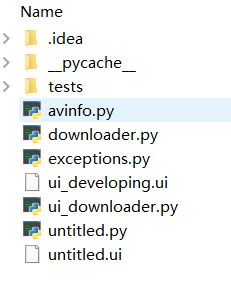

#### `QFileSystemModel` 重命名表头为中文

默认情况下，`QFileSystemModel`显示`name,size,type,modified`四列，表头都是英文，如果想要用中文显示，可以通过国际化来解决，具体步骤如下：

1. `PyQt5`已经封装好了其它语言的pm文件，不需要再自己生成。以`Anaconda`安装为例，文件位置在`Lib\site-packeages\PyQt5\Qt\translations`目录下，找到`qt_zh_CN.pm`文件，复制到你的项目目录下。
2. 读入`pm`文件，代码如下：
```python
from PyQt5.QtCore import QTranslator
app = QApplication(sys.argv)
trans = QTranslator()
trans.load("qt_zh_CN") # 注意没有后缀.qm
app.installTranslator(trans)
```

自己生成`pm`文件的方法见国际化章节。

### `QtGui.QDesktopServices`和`QtCore.QUrl`

#### 如何调用`windows`系统默认的程序

简单的两行代码就可以实现：
```
fileurl = QUrl.fromLocalFile(filepath)
QDesktopServices.openUrl(fileurl)
```
传入的参数可以是字符串，也可以是`QUrl`对象，官方文档如下：
- [Qurl](https://doc.qt.io/qtforpython/PySide2/QtCore/QUrl.html?highlight=qurl#PySide2.QtCore.QUrl)
- [QDesktopServices](https://doc.qt.io/qtforpython/PySide2/QtGui/QDesktopServices.html?highlight=qdesktopservices#PySide2.QtGui.QDesktopServices)

## 国际化

国际化方法可以参考以下两篇文章：
- [Pyqt国际化多语言支持](https://www.cnblogs.com/dcb3688/p/4578355.html)
- [《快速掌握PyQt5》第二十九章 国际化](https://blog.csdn.net/La_vie_est_belle/article/details/84061768#29.4%20%E5%9C%A8%E7%A8%8B%E5%BA%8F%E4%B8%AD%E5%AF%BC%E5%85%A5qm%E7%BF%BB%E8%AF%91%E6%96%87%E4%BB%B6%E5%B9%B6%E5%AE%9E%E7%8E%B0%E8%AF%AD%E8%A8%80%E5%88%87%E6%8D%A2%E5%8A%9F%E8%83%BD)

## 问题收集

### `QPlainText`和`QTextEdit`以及`QTextBrowser`的区别

三者都是文本控件，主要区别是`QPlainText`按行滚动的，`QTextEdit`是按像素滚动的，另外`QTextBrowser`顾名思义，主要是用来显示，文本不能被修改。